In [64]:
import numpy as np
import pandas as pd
import glob
import os
from tqdm.notebook import tqdm
tqdm.pandas()

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

In [65]:
def get_df_info(df):
    print('Dataframe shape: ', df.shape)
    print('-----'*20)
    print('Dataframe info: ')
    print(df.info())
    print('-----'*20)
    print('Dataframe null values count:')
    print(df.isna().sum())
    print('-----'*20)
    print('Dataframe duplicates count:')
    print(df.duplicated().sum())
    print('-----'*20)
    print('Dataframe sample: ')
    display(df.sample(10))


## Data preprocessing

### Read tweets file with sentiments

In [66]:
df = pd.read_csv('./dataset/Tweets/tweets-sentiment-500k.csv', parse_dates = ['date'], lineterminator='\n')
get_df_info(df)

Dataframe shape:  (532142, 6)
----------------------------------------------------------------------------------------------------
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532142 entries, 0 to 532141
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   index      532142 non-null  int64              
 1   date       532142 non-null  datetime64[ns, UTC]
 2   tweets     532142 non-null  object             
 3   bearish    532142 non-null  float64            
 4   bullish    532142 non-null  float64            
 5   sentiment  532142 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(2)
memory usage: 24.4+ MB
None
----------------------------------------------------------------------------------------------------
Dataframe null values count:
index        0
date         0
tweets       0
bearish      0
bullish      0
sentiment    0
dtype:

,index,date,tweets,bearish,bullish,sentiment
155109,171272,2020-04-23 13:52:44+00:00,"$VERB ~ @VerbTech_Co To Launch #Secure, #Inter...",0.001396,0.998604,bullish
481474,719356,2020-07-01 18:24:00+00:00,"$AAPL closing more stores, $MSFT closed ALL st...",0.993838,0.006161,bearish
311556,130686,2020-04-20 12:06:56+00:00,Home Depot $HD PT Lowered to $220.00 https://t...,0.980645,0.019355,bearish
159592,498758,2020-06-11 08:06:11+00:00,$1498779D #Kangji Medical Holdings Ltd Kangji ...,0.001419,0.998581,bullish
90621,798949,2020-07-08 15:55:04+00:00,"LIVE S&amp;P 500 Today - AMZN, AAPL, MSFT MAKE...",0.001567,0.998433,bullish
529590,910959,2020-07-16 18:21:30+00:00,"California reports 356,178 COVID-19 cases, up ...",0.997012,0.002988,bearish
357218,291346,2020-05-06 15:02:08+00:00,$es_f 2880 - 2889 resistance area\n2857 - 284...,0.989304,0.010696,bearish
333215,203592,2020-04-26 12:31:37+00:00,"RT @TicTocTick: Technically, things as they st...",0.857507,0.142493,bearish
337196,218891,2020-04-27 02:00:05+00:00,Huge variation: Time Warner Inc. New Common St...,0.977651,0.022349,bearish
85713,797928,2020-07-08 16:58:20+00:00,$AAPL back to the 380 level. Very close to run...,0.001545,0.998455,bullish


### Drop index column

In [67]:
df = df.loc[:, df.columns != 'index']
df.head()

,date,tweets,bearish,bullish,sentiment
0,2020-06-25 14:49:53+00:00,RT @unusualOA: Date : 06/25/2020\nTime : 10:4...,0.002087,0.997913,bullish
1,2020-05-29 17:30:27+00:00,RT @jdh: Phenomenal chart. Know how for the la...,0.051510,0.948490,bullish
2,2020-04-16 17:03:23+00:00,Technology Sector Overview\n\nmore info: https...,0.001415,0.998585,bullish
3,2020-07-08 14:50:52+00:00,$CLNE partnering with Chevron $CVX.\n\nCould r...,0.001398,0.998602,bullish
4,2020-05-08 00:06:12+00:00,“Mr Wonderful”: Buy $GOLD\n\n$spy $spx $qqq $i...,0.001714,0.998286,bullish


In [68]:
df.duplicated().sum()

0

In [69]:
df = df.set_index('date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 532142 entries, 2020-06-25 14:49:53+00:00 to 2020-07-16 00:00:23+00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tweets     532142 non-null  object 
 1   bearish    532142 non-null  float64
 2   bullish    532142 non-null  float64
 3   sentiment  532142 non-null  object 
dtypes: float64(2), object(2)
memory usage: 20.3+ MB


In [70]:
df.head()

,tweets,bearish,bullish,sentiment
date,,,,
2020-06-25 14:49:53+00:00,RT @unusualOA: Date : 06/25/2020\nTime : 10:4...,0.002087,0.997913,bullish
2020-05-29 17:30:27+00:00,RT @jdh: Phenomenal chart. Know how for the la...,0.051510,0.948490,bullish
2020-04-16 17:03:23+00:00,Technology Sector Overview\n\nmore info: https...,0.001415,0.998585,bullish
2020-07-08 14:50:52+00:00,$CLNE partnering with Chevron $CVX.\n\nCould r...,0.001398,0.998602,bullish
2020-05-08 00:06:12+00:00,“Mr Wonderful”: Buy $GOLD\n\n$spy $spx $qqq $i...,0.001714,0.998286,bullish


## Exploratory data analysis

### Dates range of dataframe

In [71]:
print(str(df.index.min()) + ' ' +  str(df.index.max()))

2020-04-09 00:00:15+00:00 2020-07-16 23:59:12+00:00


### Distribuition of tweet sentiments

In [72]:
df.groupby('sentiment')['tweets'].count()

sentiment
bearish    262142
bullish    270000
Name: tweets, dtype: int64

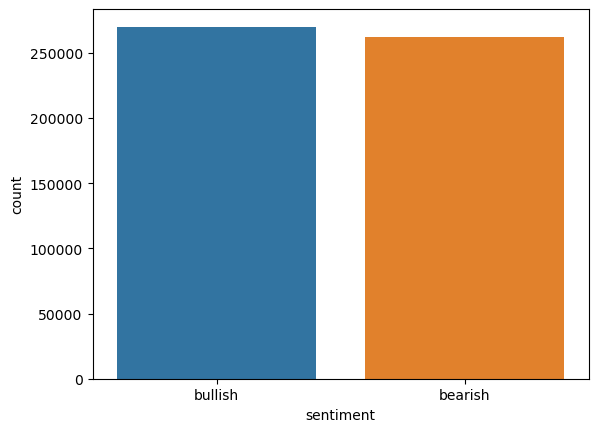

In [73]:
sns.countplot(data = df, x = 'sentiment')
plt.show()

#### Length distribuition of tweets

In [74]:
df['tweet_length'] = df['tweets'].apply(lambda tweet: len(tweet.split()))
tweet_length_mean = np.mean(df['tweet_length'])
print('Mean length of tweets: ' + str(tweet_length_mean))
df.sample(5)

Mean length of tweets: 22.530114142465735


,tweets,bearish,bullish,sentiment,tweet_length
date,,,,,
2020-07-01 18:07:07+00:00,RT @SheepKnowMore: An $FB post after watching ...,0.977079,0.022921,bearish,12
2020-06-09 02:16:15+00:00,RT @the_chart_life: Regional Banks have outper...,0.912333,0.087667,bearish,26
2020-07-04 11:38:40+00:00,RT @DoorMisterdooor: Staying on the right side...,0.584671,0.415329,bearish,24
2020-06-11 09:28:23+00:00,"How I like to trade, find the most volatile in...",0.592416,0.407584,bearish,19
2020-04-14 21:24:46+00:00,RT @KimbleCharting: Silver/Gold indicator crea...,0.028479,0.971521,bullish,18


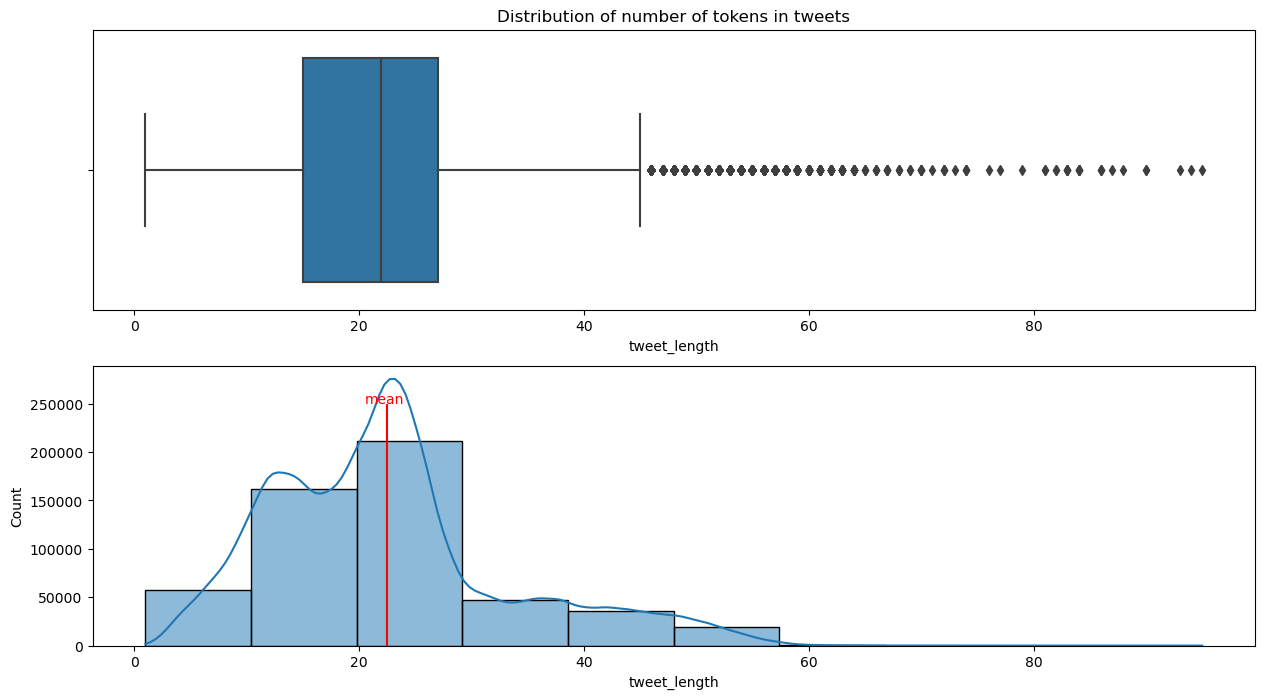

In [75]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].set_title('Distribution of number of tokens in tweets')
sns.boxplot(x = df['tweet_length'], ax=axes[0])
sns.histplot(x = df['tweet_length'], bins=10, kde=True, ax=axes[1])
axes[1].vlines(tweet_length_mean, 0, 250000, color = 'r')
plt.annotate("mean", xy=(tweet_length_mean, 250000), xytext=(tweet_length_mean-2, 250000),
            color='r')
plt.show()

#### Emoticons analysis

In [76]:
# !pip install -U emoji

In [77]:
# emoticons
import emoji
import regex as re

target_emojis = {
    'bearish': [],
    'bullish': []
}

for _, row in tqdm(df.iterrows()):
    if(emoji.emoji_count(row['tweets']) >= 1):
        emoji_list = emoji.emoji_list(row['tweets'])
        emojis = [emoji_item['emoji'] for emoji_item in emoji_list]
        target_emojis[row['sentiment']].extend(emojis)

0it [00:00, ?it/s]

Top emojis for bearish 
 ['🎯', '📉', '😂', '👇', '🔻', '🇺🇸', '🤣', '📈', '🤔', '🔥', '👉', '📌', '👀', '🚨', '🐻', '💰', '📊', '❤️', '🔴', '✅']


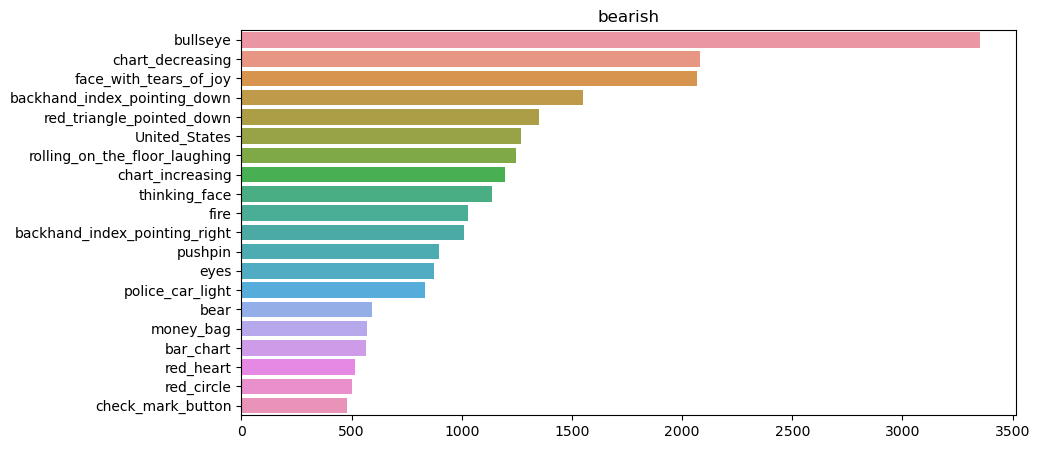

Top emojis for bullish 
 ['🔥', '🚀', '📈', '🇺🇸', '💰', '👇', '✅', '⬆️', '👉', '💥', '🚨', '🐿️', '👀', '🎯', '😂', '🤑', '💸', '📌', '▪️', '➡️']


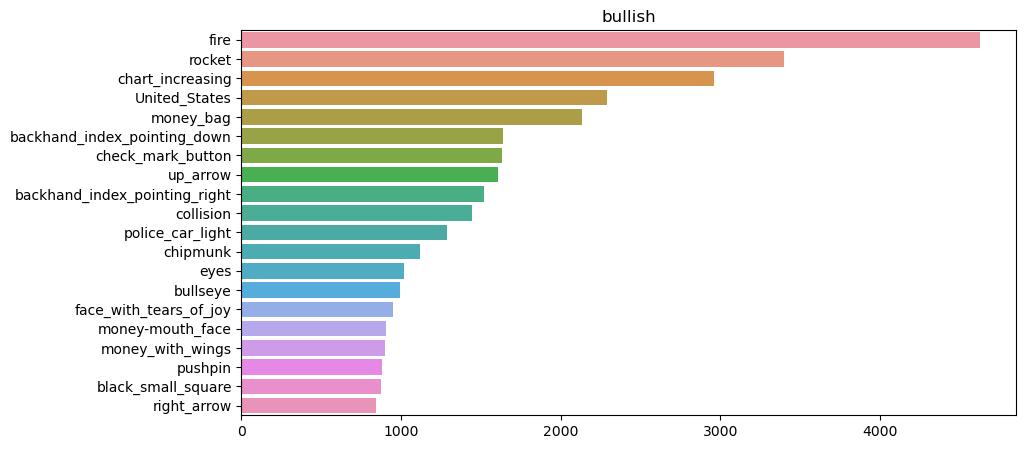

In [78]:
for t, emojis in target_emojis.items():
    plt.figure(figsize=(10, 5))
    bar_info = pd.Series(emojis).value_counts()[:20]
    print('=========='*10,  f'\nTop emojis for {t} \n', list(bar_info.index))
    bar_info.index = [emoji.demojize(i, delimiters=("", "")) for i in bar_info.index]
    sns.barplot(x=bar_info.values, y=bar_info.index)
        
    plt.title(f'{t}')
    plt.show()

### Number of tweets per week

<AxesSubplot:xlabel='date'>

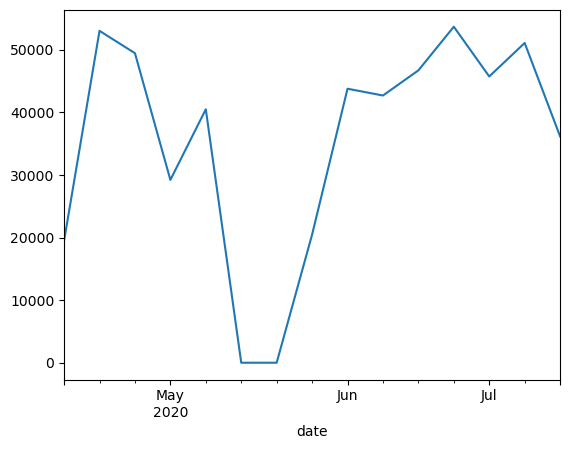

In [79]:
df.groupby([pd.Grouper(freq='W')])['tweets'].count().plot()

### Top 10 mentioned stocks

In [80]:
def get_stock_ticker(tweet):
    return [x.group(2).upper() for x in re.finditer(r'(\$)([A-Za-z]+)', tweet)]

stock_tickers = []
for tweet in df['tweets']:
    stock_tickers.extend(get_stock_ticker(tweet))

top_10_stocks = pd.Series(stock_tickers).value_counts()[:10]

display(top_10_stocks)

SPX     121626
SPY      73800
AAPL     66675
AMZN     57310
FB       49149
MSFT     32971
TSLA     31003
ES       30308
QQQ      30023
NFLX     19641
dtype: int64